In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix,r2_score,accuracy_score

In [25]:
data=pd.read_csv("C:\\Users\\sgupta1\\Desktop\\machine learning git files\\machine_learning\\KNN\\TNSTATE_ShortTerm.csv")

In [26]:
data

,,AADT,AADT Code,AADT Year,AADT BC (4-13),AADT BC (4-13) Code,Category,Collection Group,Functional Class Text,Located On,Latitude,Longitude,Rural/Urban,D Factor,K Factor,AADT PA (1-3),AADT PA (1-3) Code,AADT Single Trucks,AADT Combo Trucks
0,01000001R,6586.0,1.0,2013.0,NaN,NaN,RP,Coverage,Interstate,I0075,36.165629,-84.079690,R,1.00,0.09,NaN,NaN,NaN,NaN
1,01000001R,5918.0,1.0,2014.0,NaN,NaN,RP,Coverage,Interstate,I0075,36.165629,-84.079690,R,1.00,0.09,NaN,NaN,NaN,NaN
2,01000001R,7444.0,1.0,2015.0,NaN,NaN,RP,Coverage,Interstate,I0075,36.165629,-84.079690,R,1.00,0.08,NaN,NaN,NaN,NaN
3,01000001R,6643.0,1.0,2016.0,NaN,NaN,RP,Coverage,Interstate,I0075,36.165629,-84.079690,R,1.00,0.09,NaN,NaN,NaN,NaN
4,01000001R,6376.0,1.0,2017.0,NaN,NaN,RP,Coverage,Interstate,I0075,36.165629,-84.079690,R,1.00,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140138,95000237,1515.0,2.0,2018.0,NaN,NaN,CC,Coverage,Major Collector,01368,36.175602,-86.456863,U,NaN,NaN,NaN,NaN,NaN,NaN
140139,95000237,15665.0,1.0,2019.0,NaN,NaN,CC,Coverage,Major Collector,01368,36.175602,-86.456863,U,0.58,0.12,NaN,NaN,NaN,NaN
140140,95000237,13832.0,3.0,2020.0,511.0,11.0,CC,Coverage,Major Collector,01368,36.175602,-86.456863,U,0.58,0.12,13321.0,11.0,303.0,208.0
140141,95000237,15008.0,3.0,2021.0,450.0,11.0,CC,Coverage,Major Collector,01368,36.175602,-86.456863,U,0.58,0.12,14558.0,11.0,300.0,150.0


<b> USING ONE HOT ENCODING </b>

In [27]:
data_=data.copy()

In [28]:
data_.columns

Index([' ', 'AADT', 'AADT Code', 'AADT Year', 'AADT BC (4-13)',
       'AADT BC (4-13) Code', 'Category', 'Collection Group',
       'Functional Class Text', 'Located On', 'Latitude', 'Longitude',
       'Rural/Urban', 'D Factor', 'K Factor', 'AADT PA (1-3)',
       'AADT PA (1-3) Code', 'AADT Single Trucks', 'AADT Combo Trucks'],
      dtype='object')

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean
data_['AADT'] = imputer.fit_transform(data_['AADT'].values.reshape(-1, 1))

In [30]:
encoder=LabelEncoder()
data_['Functional Class Text']=encoder.fit_transform(data_['Functional Class Text'])
data_['Rural/Urban']=encoder.fit_transform(data_['Rural/Urban'])

In [31]:
x=data_[['Functional Class Text','Rural/Urban']]
y=data_['AADT']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
k = 1000  # You can choose an appropriate value for k
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1000)

In [59]:
y_pred = knn.predict(x_test)

In [60]:
y_pred

array([ 9273.0798849,  4323.164    ,   688.151    , ..., 22194.7781415,
        1678.445    ,  2283.533    ])

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12890.002537320555
R-squared: 0.22602695661536254


for k=1000
Root Mean Squared Error: 12890.002537320555
R-squared: 0.22602695661536254

for k=7 
Root Mean Squared Error: 13518.686110322147
R-squared: 0.14868791635697876

for k=5
Root Mean Squared Error: 14688.344730634706
R-squared: -0.004998798907716262

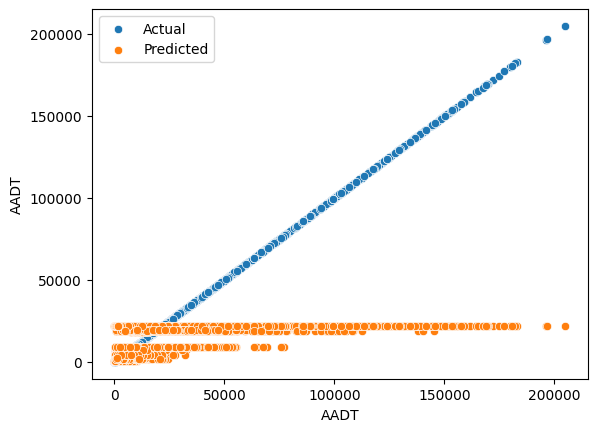

In [62]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_test,label='Actual', marker='o')
sns.scatterplot(x=y_test, y=y_pred, label='Predicted', marker='o')
plt.show()

<b> IMPROVING PREDICTIONS Random forest</b>

In [66]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
y_pred_rf=rf.predict(x_test)

In [68]:
y_mod_predicted=0.5*y_pred+0.5*y_pred_rf

In [69]:
mse = mean_squared_error(y_test, y_mod_predicted)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_mod_predicted)
print(f"Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12874.958598081721
R-squared: 0.2278325123196212


<b> Using Geographically Weighted Regression Model </b>

USING SPATIAL NEURAL NETWORK

In [78]:
import tensorflow as tf

In [79]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [80]:
model.compile(optimizer='adam', loss='mse')

In [84]:
y_pred_nn = model.predict(x_test)

876/876 [==============================] - 1s 522us/step


In [82]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3504/3504 [==============================] - 2s 676us/step - loss: 172731392.0000
Epoch 2/20
3504/3504 [==============================] - 2s 682us/step - loss: 172643056.0000
Epoch 3/20
3504/3504 [==============================] - 2s 676us/step - loss: 172559632.0000
Epoch 4/20
3504/3504 [==============================] - 2s 676us/step - loss: 172510368.0000
Epoch 5/20
3504/3504 [==============================] - 2s 677us/step - loss: 172435056.0000
Epoch 6/20
3504/3504 [==============================] - 2s 699us/step - loss: 172333440.0000
Epoch 7/20
3504/3504 [==============================] - 2s 688us/step - loss: 172258480.0000
Epoch 8/20
3504/3504 [==============================] - 2s 667us/step - loss: 172188048.0000
Epoch 9/20
3504/3504 [==============================] - 2s 680us/step - loss: 172140656.0000
Epoch 10/20
3504/3504 [==============================] - 2s 674us/step - loss: 172029056.0000
Epoch 11/20
3504/3504 [==============================] - 2s 672us/ste

In [86]:
mse = mean_squared_error(y_test, y_pred_nn)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_mod_predicted)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 12965.690371959612
R-squared: 0.2278325123196212
